https://www.youtube.com/watch?v=0pGXW0bCgHE

# <u>Vehicle Insurance Claim Fraud Detection Using Machine Learning</u>

This project focuses on developing a machine learning model to detect fraudulent vehicle insurance claims. By analyzing historical claim data, various features such as claim amount, vehicle details, customer information, and accident history were used to train a classifier to differentiate between legitimate and fraudulent claims. The project aims to minimize financial losses for insurance companies by accurately identifying fraudulent activity, improving claim processing efficiency, and reducing the manual effort required for fraud detection

Dataset: https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection

## Project Owner: Manuel Contreras

### 1 - Libraries

#### Data Manipulation and Analysis

In [207]:
import pandas as pd
import numpy as np

#### Data Visualization

In [208]:
import seaborn as sns 
import matplotlib.pyplot as plt 

#### Data Preprocessing

In [209]:
from sklearn.preprocessing import StandardScaler

#### Machine Learning Algorithms

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest

#### Model Evaluation Metrics

In [211]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc

#### Imbalance Learning

In [212]:
from imblearn.combine import SMOTEENN

#### Model Selection

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


### 2 - Dataset Import and Feature Computation

In [214]:
file_path = r"C:\Users\manue\Desktop\DataScience\Datasets\fraud_oracle.csv"

df = pd.read_csv(file_path)

In [215]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [216]:
rows, columns = df.shape
print(f"The dataset has {columns} columns and {rows} rows.")

The dataset has 33 columns and 15420 rows.


In [217]:
column_names = df.columns.values
column_names

array(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent',
       'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim',
       'NumberOfCars', 'Year', 'BasePolicy'], dtype=object)

In [218]:
# value counts 
value_counts = df['FraudFound_P'].value_counts()
value_proportions = df['FraudFound_P'].value_counts(normalize=True)

print("Fraud Value Counts:\n")
print(value_counts)

print("\n---------------------------\n")

# value proportions 
print("Fraud Value Proportions:\n")
print(value_proportions)

Fraud Value Counts:

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

---------------------------

Fraud Value Proportions:

FraudFound_P
0    0.940143
1    0.059857
Name: proportion, dtype: float64


### 3 - Exploratory Data Analysis

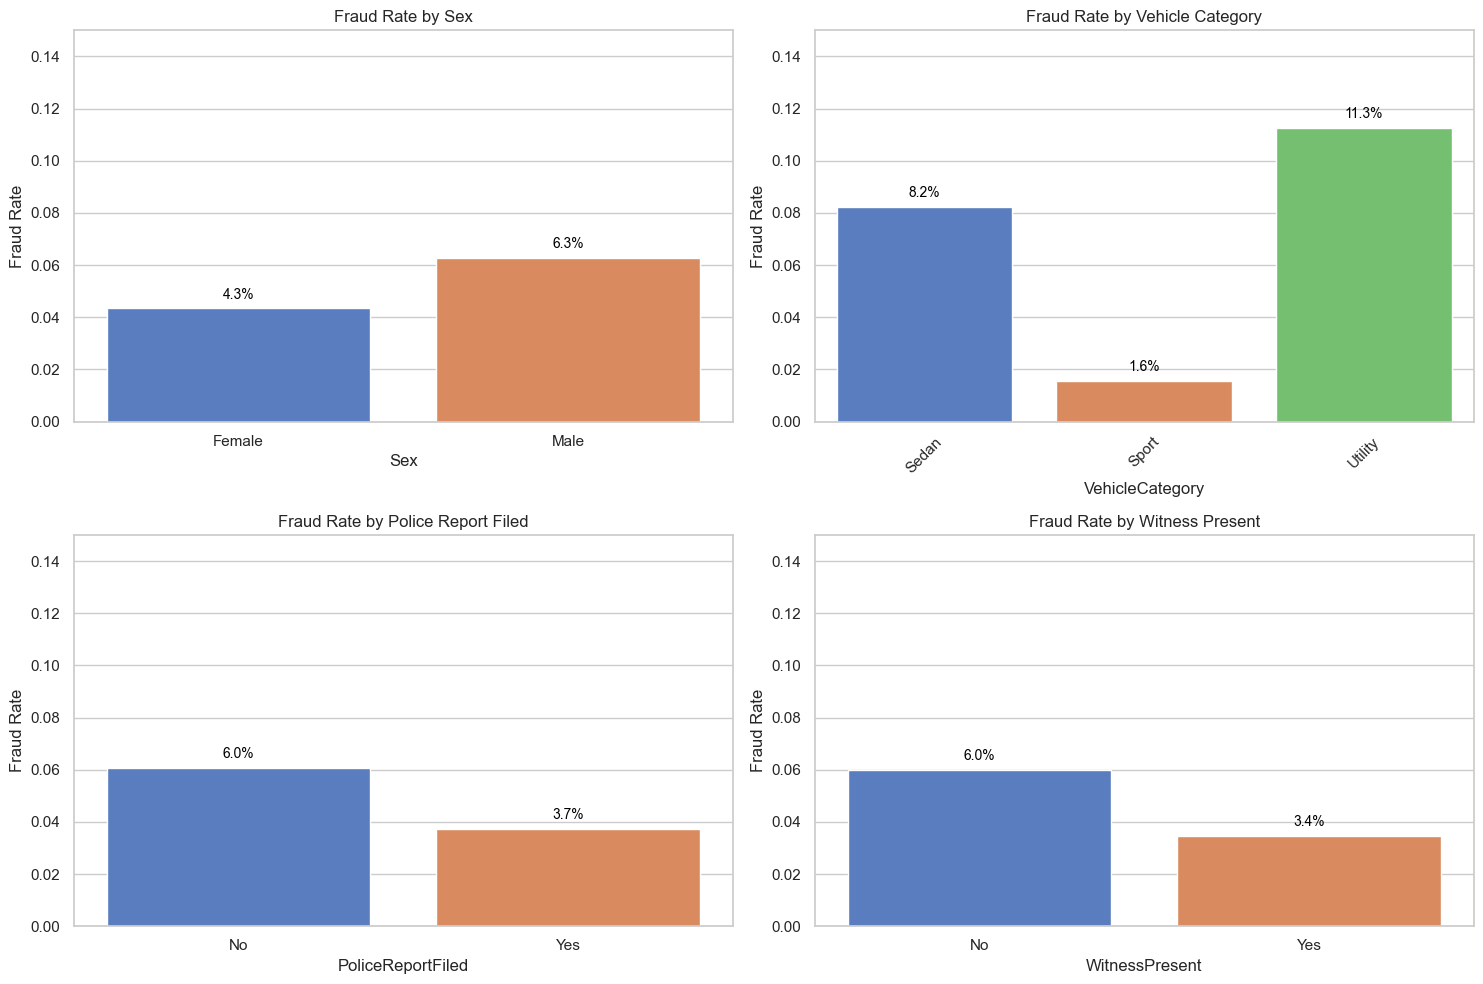

In [219]:
# style for the plots
sns.set(style="whitegrid")

# 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Fraud Rate by Sex
fraud_rate_sex = df.groupby('Sex')['FraudFound_P'].mean().reset_index()
sns.barplot(data=fraud_rate_sex, x='Sex', y='FraudFound_P', ax=axes[0, 0], hue='Sex', palette='muted', legend=False)
axes[0, 0].set_title('Fraud Rate by Sex')
axes[0, 0].set_ylim(0, 0.15)  # Increase y-axis limit
axes[0, 0].set_ylabel('Fraud Rate')

# percentage annotations on top of the bars
for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{p.get_height() * 100:.1f}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=10, color='black', 
                        xytext=(0, 5), textcoords='offset points')

# Fraud Rate by Vehicle Category
fraud_rate_vehicle = df.groupby('VehicleCategory')['FraudFound_P'].mean().reset_index()
sns.barplot(data=fraud_rate_vehicle, x='VehicleCategory', y='FraudFound_P', ax=axes[0, 1], hue='VehicleCategory', palette='muted', legend=False)
axes[0, 1].set_title('Fraud Rate by Vehicle Category')
axes[0, 1].set_ylim(0, 0.15)  # Increase y-axis limit
axes[0, 1].set_ylabel('Fraud Rate')
axes[0, 1].tick_params(axis='x', rotation=45)

# percentage annotations on top of the bars
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{p.get_height() * 100:.1f}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=10, color='black', 
                        xytext=(0, 5), textcoords='offset points')

# Fraud Rate by Police Report Filed
fraud_rate_police_report = df.groupby('PoliceReportFiled')['FraudFound_P'].mean().reset_index()
sns.barplot(data=fraud_rate_police_report, x='PoliceReportFiled', y='FraudFound_P', ax=axes[1, 0], hue='PoliceReportFiled', palette='muted', legend=False)
axes[1, 0].set_title('Fraud Rate by Police Report Filed')
axes[1, 0].set_ylim(0, 0.15)  # Increase y-axis limit
axes[1, 0].set_ylabel('Fraud Rate')

# percentage annotations on top of the bars
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{p.get_height() * 100:.1f}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=10, color='black', 
                        xytext=(0, 5), textcoords='offset points')

# Fraud Rate by Witness Present
fraud_rate_witness = df.groupby('WitnessPresent')['FraudFound_P'].mean().reset_index()
sns.barplot(data=fraud_rate_witness, x='WitnessPresent', y='FraudFound_P', ax=axes[1, 1], hue='WitnessPresent', palette='muted', legend=False)
axes[1, 1].set_title('Fraud Rate by Witness Present')
axes[1, 1].set_ylim(0, 0.15)  # Increase y-axis limit
axes[1, 1].set_ylabel('Fraud Rate')

# percentage annotations on top of the bars
for p in axes[1, 1].patches:
    axes[1, 1].annotate(f'{p.get_height() * 100:.1f}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=10, color='black', 
                        xytext=(0, 5), textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

From the graphs above it is interesting to note, and as expected, that when there are no witness present and no police report is filed, there are more chances of commiting fraud. 

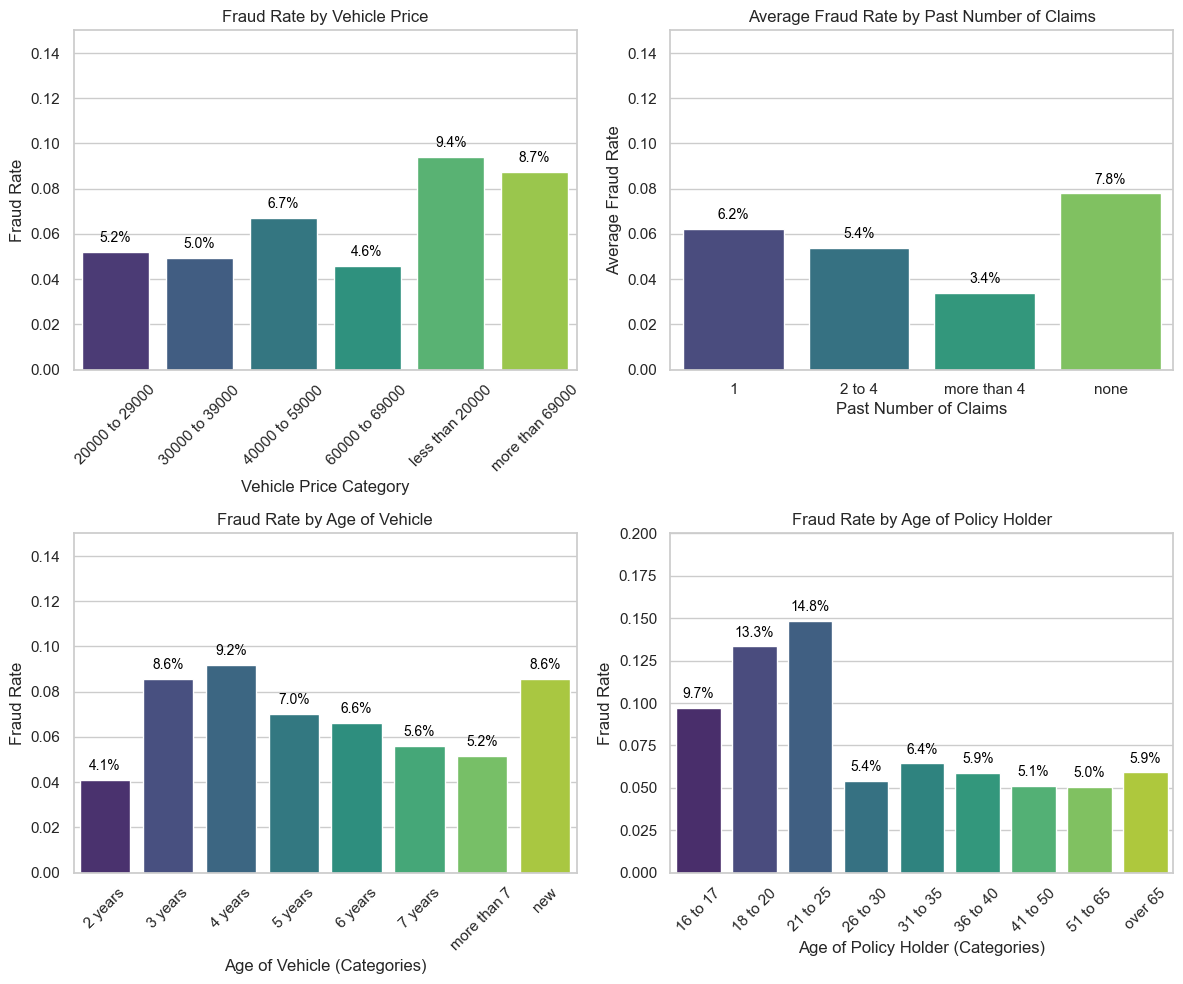

In [220]:
# count of fraudulent claims and total claims by Vehicle Price Category
fraud_count_vehicle_price = df.groupby('VehiclePrice')['FraudFound_P'].agg(['sum', 'count']).reset_index()
fraud_count_vehicle_price['FraudRate'] = fraud_count_vehicle_price['sum'] / fraud_count_vehicle_price['count']

# average fraud rate by Past Number of Claims
avg_fraud_rate_claims = df.groupby('PastNumberOfClaims')['FraudFound_P'].mean().reset_index()

# count of fraudulent claims and total claims by Age of Vehicle
fraud_count_age_of_vehicle = df.groupby('AgeOfVehicle')['FraudFound_P'].agg(['sum', 'count']).reset_index()
fraud_count_age_of_vehicle['FraudRate'] = fraud_count_age_of_vehicle['sum'] / fraud_count_age_of_vehicle['count']

# count of fraudulent claims and total claims by Age of Policy Holder
fraud_count_age_of_policy_holder = df.groupby('AgeOfPolicyHolder')['FraudFound_P'].agg(['sum', 'count']).reset_index()
fraud_count_age_of_policy_holder['FraudRate'] = fraud_count_age_of_policy_holder['sum'] / fraud_count_age_of_policy_holder['count']

# Create a 2x2 matrix of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust spacing between plots

# Plot 1: Fraud Rate by Vehicle Price
sns.barplot(data=fraud_count_vehicle_price, 
            x='VehiclePrice', 
            y='FraudRate', 
            hue='VehiclePrice', 
            palette='viridis', 
            ax=axes[0, 0], 
            legend=False)
axes[0, 0].set_title('Fraud Rate by Vehicle Price')
axes[0, 0].set_xlabel('Vehicle Price Category')
axes[0, 0].set_ylabel('Fraud Rate')
axes[0, 0].set_ylim(0, 0.15)  
axes[0, 0].tick_params(axis='x', rotation=45)

# Add percentage annotations on top of the bars for Plot 1
for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{p.get_height() * 100:.1f}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=10, color='black', 
                        xytext=(0, 5),  
                        textcoords='offset points')

# Plot 2: Average Fraud Rate by Past Number of Claims
sns.barplot(data=avg_fraud_rate_claims, 
            x='PastNumberOfClaims', 
            y='FraudFound_P', 
            hue='PastNumberOfClaims', 
            palette='viridis', 
            ax=axes[0, 1], 
            legend=False)
axes[0, 1].set_title('Average Fraud Rate by Past Number of Claims')
axes[0, 1].set_xlabel('Past Number of Claims')
axes[0, 1].set_ylabel('Average Fraud Rate')
axes[0, 1].set_ylim(0, 0.15)  

# Add percentage annotations on top of the bars for Plot 2
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{p.get_height() * 100:.1f}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=10, color='black', 
                        xytext=(0, 5),  
                        textcoords='offset points')

# Plot 3: Fraud Rate by Age of Vehicle
sns.barplot(data=fraud_count_age_of_vehicle, 
            x='AgeOfVehicle', 
            y='FraudRate', 
            hue='AgeOfVehicle', 
            palette='viridis', 
            ax=axes[1, 0], 
            legend=False)
axes[1, 0].set_title('Fraud Rate by Age of Vehicle')
axes[1, 0].set_xlabel('Age of Vehicle (Categories)')
axes[1, 0].set_ylabel('Fraud Rate')
axes[1, 0].set_ylim(0, 0.15)  
axes[1, 0].tick_params(axis='x', rotation=45)

# Add percentage annotations on top of the bars for Plot 3
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{p.get_height() * 100:.1f}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=10, color='black', 
                        xytext=(0, 5),  
                        textcoords='offset points')

# Plot 4: Fraud Rate by Age of Policy Holder
sns.barplot(data=fraud_count_age_of_policy_holder, 
            x='AgeOfPolicyHolder', 
            y='FraudRate', 
            hue='AgeOfPolicyHolder', 
            palette='viridis', 
            ax=axes[1, 1], 
            legend=False)
axes[1, 1].set_title('Fraud Rate by Age of Policy Holder')
axes[1, 1].set_xlabel('Age of Policy Holder (Categories)')
axes[1, 1].set_ylabel('Fraud Rate')
axes[1, 1].set_ylim(0, 0.2)  
axes[1, 1].tick_params(axis='x', rotation=45)

# Add percentage annotations on top of the bars for Plot 4
for p in axes[1, 1].patches:
    axes[1, 1].annotate(f'{p.get_height() * 100:.1f}%', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=10, color='black', 
                        xytext=(0, 5),  # Vertical offset
                        textcoords='offset points')

plt.tight_layout()  
plt.show()

C:\Users\manue\AppData\Local\Temp\ipykernel_5376\672999880.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




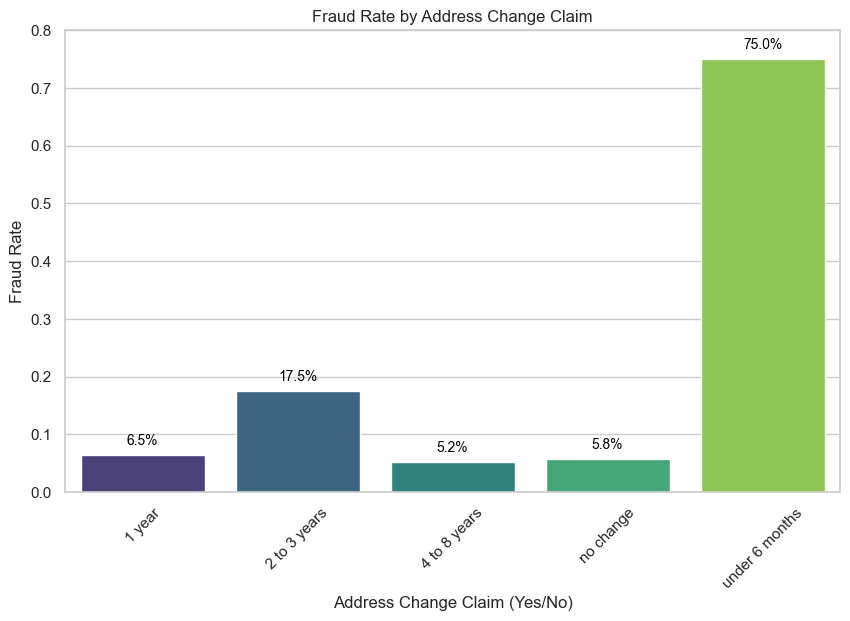

In [221]:
# count of fraudulent claims and total claims by Address Change Claim
fraud_count_address_change = df.groupby('AddressChange_Claim')['FraudFound_P'].agg(['sum', 'count']).reset_index()
fraud_count_address_change['FraudRate'] = fraud_count_address_change['sum'] / fraud_count_address_change['count']

# Plotting
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=fraud_count_address_change, x='AddressChange_Claim', y='FraudRate', palette='viridis')

plt.title('Fraud Rate by Address Change Claim')
plt.xlabel('Address Change Claim (Yes/No)')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.ylim(0, 0.8)  

# percentage annotations 
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height() * 100:.1f}%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=10, color='black', 
                      xytext=(0, 5),  # Vertical offset
                      textcoords='offset points')

plt.show()

As expected, individuals engaging in fraudulent activity often exhibit deceptive behavior, which is reflected in the frequent occurrence of address changes associated with such actions.

### 3 - Data Cleaning

#### Elimination of unnecesary variables and duplicates

In [222]:
df = df.drop(['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Year','PolicyNumber','RepNumber'], axis=1)

In [223]:
df.duplicated().sum()

265

In [224]:
# Drop duplicates in place
df.drop_duplicates(inplace=True)

#### Check Datatypes and Feature Engineering

In [225]:
print("Data Types of Each Column in the DataFrame:\n")
print(df.dtypes)

Data Types of Each Column in the DataFrame:

Make                    object
AccidentArea            object
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
BasePolicy              object
dtype: object


Several categorical variables, like Days_Policy_Claim, AgeOfVehicle, among others can be converted to numerical format, which would enhance the depth and value of our analysis

In [226]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Now, display the first few rows
df.head()

,Make,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Honda,Urban,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Honda,Urban,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Honda,Urban,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Toyota,Rural,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Honda,Urban,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision


Processing of VehiclePrice

For VehiclePrice to be used in the algorithm, it is necessary to convert it to numeric. I see that the values are in a range, so to simplify the analysis, I will just take the mid value. For the VehiclePrice "more than 69000" I set a maximum price of 100000 to find the medium price.

In [227]:
value_counts = df['VehiclePrice'].value_counts()
print(value_counts)

VehiclePrice
20000 to 29000     8007
30000 to 39000     3512
more than 69000    1995
less than 20000    1093
40000 to 59000      461
60000 to 69000       87
Name: count, dtype: int64


In [228]:
# Function to convert price ranges into numeric values 
def convert_price_range(value):
    if 'more than' in value:
        # Extract the lower bound and set upper bound to 100,000
        lower_bound = int(value.split(' ')[-1])
        return lower_bound, 100000
    elif 'to' in value:
        # Extract the range bounds
        bounds = value.split(' to ')
        lower_bound = int(bounds[0])
        upper_bound = int(bounds[1])
        return lower_bound, upper_bound
    else:
        return np.nan, np.nan

# Apply to VehiclePrice column
df[['min_price', 'max_price']] = df['VehiclePrice'].apply(lambda x: pd.Series(convert_price_range(x)))

df['mid_price'] = df[['min_price', 'max_price']].mean(axis=1)

Processing of Days_Policy_Accident

For none I set 0, and for more than 30 I set a maximum of 90 days. The mid values are calculated. 

In [229]:
value_counts = df['Days_Policy_Accident'].value_counts()
print(value_counts)

Days_Policy_Accident
more than 30    14982
none               55
8 to 15            55
15 to 30           49
1 to 7             14
Name: count, dtype: int64


In [230]:
def convert_days_policy_accident(value):
    if value == 'none':
        return 0
    elif 'more than' in value:
        return (30 + 90) / 2  
    elif 'to' in value:
        # Extract the range bounds
        bounds = value.split(' to ')
        lower_bound = int(bounds[0])
        upper_bound = int(bounds[1])
        return (lower_bound + upper_bound) / 2  
    else:
        return int(value)  

# Apply to 'Days_Policy_Accident' column
df['Days_Policy_Accident_Numeric'] = df['Days_Policy_Accident'].apply(convert_days_policy_accident)

Processing of Days_Policy_Claim

In [231]:
value_counts = df['Days_Policy_Claim'].value_counts()
print(value_counts)

Days_Policy_Claim
more than 30    15077
15 to 30           56
8 to 15            21
none                1
Name: count, dtype: int64


In [232]:
def convert_Days_Policy_Claim(value):
    if value == 'none':
        return 0
    elif 'more than' in value:
        return (30 + 90) / 2 
    elif 'to' in value:
        bounds = value.split(' to ')
        lower_bound = int(bounds[0])
        upper_bound = int(bounds[1])
        return (lower_bound + upper_bound) / 2  
    else:
        return int(value)  

# Apply to 'Days_Policy_Accident' column
df['Days_Policy_Claim_Numeric'] = df['Days_Policy_Claim'].apply(convert_Days_Policy_Claim)
df.head()

,Make,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy,min_price,max_price,mid_price,Days_Policy_Accident_Numeric,Days_Policy_Claim_Numeric
0,Honda,Urban,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability,69000.0,100000.0,84500.0,60.0,60.0
1,Honda,Urban,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision,69000.0,100000.0,84500.0,60.0,60.0
2,Honda,Urban,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision,69000.0,100000.0,84500.0,60.0,60.0
3,Toyota,Rural,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability,20000.0,29000.0,24500.0,60.0,60.0
4,Honda,Urban,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision,69000.0,100000.0,84500.0,60.0,60.0


Processing of PastNumberOfClaims

In [233]:
value_counts = df['PastNumberOfClaims'].value_counts()
print(value_counts)

PastNumberOfClaims
2 to 4         5382
none           4266
1              3525
more than 4    1982
Name: count, dtype: int64


In [234]:
def convert_past_number_of_claims(value):
    if value == 'none':
        return 0
    elif 'more than' in value:
        return (4 + 8) / 2  # Average between 4 and 8
    elif 'to' in value:
        bounds = value.split(' to ')
        lower_bound = int(bounds[0])
        upper_bound = int(bounds[1])
        return (lower_bound + upper_bound) / 2  
    else:
        try:
            return int(value)  
        except ValueError:
            return np.nan  

# Apply to 'PastNumberOfClaims' column
df['PastNumberOfClaims_Numeric'] = df['PastNumberOfClaims'].apply(convert_past_number_of_claims)

Processing of AgeOfVehicle

In [235]:
value_counts = df['AgeOfVehicle'].value_counts()
print(value_counts)

AgeOfVehicle
7 years        5760
more than 7    3957
6 years        3425
5 years        1350
4 years         229
new             210
3 years         151
2 years          73
Name: count, dtype: int64


In [236]:
def convert_age_of_vehicle(value):
    # Remove the word 'years' and strip whitespace
    value = value.replace('years', '').strip()
    
    if value == 'new':
        return 0  # Assign 0 for 'new'
    elif 'more than' in value:
        return 9  # Assign 9 for 'more than 7 years'
    else:
        try:
            return int(value)  # Convert remaining values to integers
        except ValueError:
            return np.nan  

# Apply to 'AgeOfVehicle' column
df['AgeOfVehicle_Numeric'] = df['AgeOfVehicle'].apply(convert_age_of_vehicle)

Processing of AgeOfPolicyHolder

In [237]:
value_counts = df['AgeOfPolicyHolder'].value_counts()
print(value_counts)

AgeOfPolicyHolder
31 to 35    5554
36 to 40    4013
41 to 50    2806
51 to 65    1385
26 to 30     610
over 65      508
16 to 17     157
21 to 25     108
18 to 20      14
Name: count, dtype: int64


In [239]:
# Function to process 'AgeOfPolicyHolder' values
def convert_age_of_policy_holder(value):
    if value == 'over 65':
        return 70  # Assign 70 for 'over 65'
    elif 'to' in value:  # Check for ranges like '26 to 30'
        bounds = value.split(' to ')
        lower_bound = int(bounds[0].strip())  
        upper_bound = int(bounds[1].strip())  
        return (lower_bound + upper_bound) / 2  # Return average of the range
    try:
        return int(value)  # Convert valid numeric values to integers
    except ValueError:
        return np.nan  # Handle unexpected cases

# Apply the conversion function to 'AgeOfPolicyHolder' column
df['AgeOfPolicyHolder_Numeric'] = df['AgeOfPolicyHolder'].apply(convert_age_of_policy_holder)

# Calculate the average after the column is created
average_age = df['AgeOfPolicyHolder_Numeric'].mean()

# Fill missing values with the average
df['AgeOfPolicyHolder_Numeric'].fillna(average_age, inplace=True)

C:\Users\manue\AppData\Local\Temp\ipykernel_5376\1013074897.py:22: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Processing of NumberOfSuppliments

In [240]:
value_counts = df['NumberOfSuppliments'].value_counts()
print(value_counts)

NumberOfSuppliments
none           6814
more than 5    3847
1 to 2         2482
3 to 5         2012
Name: count, dtype: int64


In [241]:
# Function to process 'NumberOfSuppliments' values
def convert_number_of_suppliments(value):
    if value == 'none':
        return 0  # Assign 0 for 'none'
    elif value == 'more than 5':
        return 7  # Assign 7 for 'more than 5'
    elif 'to' in value:  # Check for ranges like '1 to 2'
        bounds = value.split(' to ')
        lower_bound = int(bounds[0].strip())  # Convert lower bound to int
        upper_bound = int(bounds[1].strip())  # Convert upper bound to int
        return (lower_bound + upper_bound) / 2  # Return average of the range
    try:
        return int(value)  # Convert valid numeric values to integers
    except ValueError:
        return np.nan  # Handle unexpected cases

# Apply to 'NumberOfSuppliments' column
df['NumberOfSuppliments_Numeric'] = df['NumberOfSuppliments'].apply(convert_number_of_suppliments)

# View the modified DataFrame
df.head()

,Make,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy,min_price,max_price,mid_price,Days_Policy_Accident_Numeric,Days_Policy_Claim_Numeric,PastNumberOfClaims_Numeric,AgeOfVehicle_Numeric,AgeOfPolicyHolder_Numeric,NumberOfSuppliments_Numeric
0,Honda,Urban,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability,69000.0,100000.0,84500.0,60.0,60.0,0.0,3,28.0,0.0
1,Honda,Urban,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision,69000.0,100000.0,84500.0,60.0,60.0,0.0,6,33.0,0.0
2,Honda,Urban,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision,69000.0,100000.0,84500.0,60.0,60.0,1.0,7,45.5,0.0
3,Toyota,Rural,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability,20000.0,29000.0,24500.0,60.0,60.0,1.0,9,58.0,7.0
4,Honda,Urban,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision,69000.0,100000.0,84500.0,60.0,60.0,0.0,5,33.0,0.0


Preprocessing of AddressChange_Claim

In [242]:
value_counts = df['AddressChange_Claim'].value_counts()
print(value_counts)

AddressChange_Claim
no change         14061
4 to 8 years        630
2 to 3 years        290
1 year              170
under 6 months        4
Name: count, dtype: int64


In [243]:
# Function to process 'AddressChange_Claim' values
def convert_address_change_claim(value):
    if value == 'no change':
        return 0  # Assign 0 for 'no change'
    elif value == 'under 6 months':
        return 0.25  # Assign 0.25 for 'under 6 months'
    elif value == '1 year':
        return 1  # Assign 1 for '1 year'
    elif value == '2 to 3 years':
        return 2.5  # Assign 2.5 for '2 to 3 years'
    elif value == '4 to 8 years':
        return 6  # Assign 6 for '4 to 8 years'
    try:
        # Convert valid numeric values to float if they are not already
        return float(value)  
    except ValueError:
        return np.nan  # Handle unexpected cases

# Apply to 'AddressChange_Claim' column
df['AddressChange_Claim_Numeric'] = df['AddressChange_Claim'].apply(convert_address_change_claim)

Preprocessing of NumberOfCars

In [244]:
value_counts = df['NumberOfCars'].value_counts()
print(value_counts)

NumberOfCars
1 vehicle      14052
2 vehicles       708
3 to 4           372
5 to 8            21
more than 8        2
Name: count, dtype: int64


In [245]:
# Function to process 'NumberOfCars' values
def convert_number_of_cars(value):
    if value == '1 vehicle':
        return 1
    elif value == '2 vehicles':
        return 2
    elif value == '3 to 4':
        return 3.5
    elif value == '5 to 8':
        return 6.5
    elif value == 'more than 8':
        return 9
    try:
        # convert any numeric values to float if they are not already
        return float(value)  
    except ValueError:
        return np.nan  # Handle unexpected cases

# Apply to 'NumberOfCars' column
df['NumberOfCars_Numeric'] = df['NumberOfCars'].apply(convert_number_of_cars)

In [246]:
df.head()

,Make,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy,min_price,max_price,mid_price,Days_Policy_Accident_Numeric,Days_Policy_Claim_Numeric,PastNumberOfClaims_Numeric,AgeOfVehicle_Numeric,AgeOfPolicyHolder_Numeric,NumberOfSuppliments_Numeric,AddressChange_Claim_Numeric,NumberOfCars_Numeric
0,Honda,Urban,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability,69000.0,100000.0,84500.0,60.0,60.0,0.0,3,28.0,0.0,1.0,3.5
1,Honda,Urban,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision,69000.0,100000.0,84500.0,60.0,60.0,0.0,6,33.0,0.0,0.0,1.0
2,Honda,Urban,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision,69000.0,100000.0,84500.0,60.0,60.0,1.0,7,45.5,0.0,0.0,1.0
3,Toyota,Rural,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability,20000.0,29000.0,24500.0,60.0,60.0,1.0,9,58.0,7.0,0.0,1.0
4,Honda,Urban,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision,69000.0,100000.0,84500.0,60.0,60.0,0.0,5,33.0,0.0,0.0,1.0


In [247]:
# Remove the unnecesary columns (those that were processed)

columns_to_remove = [
    'VehiclePrice', 
    'Days_Policy_Accident', 
    'Days_Policy_Claim', 
    'PastNumberOfClaims', 
    'AgeOfVehicle', 
    'AgeOfPolicyHolder', 
    'NumberOfSuppliments', 
    'AddressChange_Claim', 
    'NumberOfCars',
    'min_price',
    'max_price'
]

df.drop(columns=columns_to_remove, inplace=True)

# View the modified DataFrame
df.head()

,Make,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,FraudFound_P,Deductible,DriverRating,PoliceReportFiled,WitnessPresent,AgentType,BasePolicy,mid_price,Days_Policy_Accident_Numeric,Days_Policy_Claim_Numeric,PastNumberOfClaims_Numeric,AgeOfVehicle_Numeric,AgeOfPolicyHolder_Numeric,NumberOfSuppliments_Numeric,AddressChange_Claim_Numeric,NumberOfCars_Numeric
0,Honda,Urban,Female,Single,21,Policy Holder,Sport - Liability,Sport,0,300,1,No,No,External,Liability,84500.0,60.0,60.0,0.0,3,28.0,0.0,1.0,3.5
1,Honda,Urban,Male,Single,34,Policy Holder,Sport - Collision,Sport,0,400,4,Yes,No,External,Collision,84500.0,60.0,60.0,0.0,6,33.0,0.0,0.0,1.0
2,Honda,Urban,Male,Married,47,Policy Holder,Sport - Collision,Sport,0,400,3,No,No,External,Collision,84500.0,60.0,60.0,1.0,7,45.5,0.0,0.0,1.0
3,Toyota,Rural,Male,Married,65,Third Party,Sedan - Liability,Sport,0,400,2,Yes,No,External,Liability,24500.0,60.0,60.0,1.0,9,58.0,7.0,0.0,1.0
4,Honda,Urban,Female,Single,27,Third Party,Sport - Collision,Sport,0,400,1,No,No,External,Collision,84500.0,60.0,60.0,0.0,5,33.0,0.0,0.0,1.0


Processing of Categorical Values (that cannot be converted)

In [248]:
df.dtypes

Make                             object
AccidentArea                     object
Sex                              object
MaritalStatus                    object
Age                               int64
Fault                            object
PolicyType                       object
VehicleCategory                  object
FraudFound_P                      int64
Deductible                        int64
DriverRating                      int64
PoliceReportFiled                object
WitnessPresent                   object
AgentType                        object
BasePolicy                       object
mid_price                       float64
Days_Policy_Accident_Numeric    float64
Days_Policy_Claim_Numeric       float64
PastNumberOfClaims_Numeric      float64
AgeOfVehicle_Numeric              int64
AgeOfPolicyHolder_Numeric       float64
NumberOfSuppliments_Numeric     float64
AddressChange_Claim_Numeric     float64
NumberOfCars_Numeric            float64
dtype: object

In [249]:
categories = df.select_dtypes(include = 'object').columns

In [250]:
for i in df[categories].columns:
    print(f'The categorical column {i} has {df[i].nunique()} unique values and {df[i].isnull().sum()} missing values.')

The categorical column Make has 19 unique values and 0 missing values.
The categorical column AccidentArea has 2 unique values and 0 missing values.
The categorical column Sex has 2 unique values and 0 missing values.
The categorical column MaritalStatus has 4 unique values and 0 missing values.
The categorical column Fault has 2 unique values and 0 missing values.
The categorical column PolicyType has 9 unique values and 0 missing values.
The categorical column VehicleCategory has 3 unique values and 0 missing values.
The categorical column PoliceReportFiled has 2 unique values and 0 missing values.
The categorical column WitnessPresent has 2 unique values and 0 missing values.
The categorical column AgentType has 2 unique values and 0 missing values.
The categorical column BasePolicy has 3 unique values and 0 missing values.


In [251]:
for cat in categories:
    
    dummies = pd.get_dummies(df[cat], prefix=cat, drop_first=True)
    
    # Convert any boolean values to integers (if necessary)
    dummies = dummies.astype(int)

    # Concatenate the dummy variables to the original DataFrame
    df = pd.concat([df, dummies], axis=1)
    
    # Drop the original categorical column
    df.drop(cat, axis=1, inplace=True)
df.head()

,Age,FraudFound_P,Deductible,DriverRating,mid_price,Days_Policy_Accident_Numeric,Days_Policy_Claim_Numeric,PastNumberOfClaims_Numeric,AgeOfVehicle_Numeric,AgeOfPolicyHolder_Numeric,NumberOfSuppliments_Numeric,AddressChange_Claim_Numeric,NumberOfCars_Numeric,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,BasePolicy_Collision,BasePolicy_Liability
0,21,0,300,1,84500.0,60.0,60.0,0.0,3,28.0,0.0,1.0,3.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,34,0,400,4,84500.0,60.0,60.0,0.0,6,33.0,0.0,0.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
2,47,0,400,3,84500.0,60.0,60.0,1.0,7,45.5,0.0,0.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,65,0,400,2,24500.0,60.0,60.0,1.0,9,58.0,7.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1
4,27,0,400,1,84500.0,60.0,60.0,0.0,5,33.0,0.0,0.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [252]:
# Are there still missing values?
null_counts = df.isnull().sum()

print(null_counts[null_counts > 0])

mid_price    1093
dtype: int64


If the percentage of null values of these rows with null values corresponds to the percentage of null values of each class of the whole dataset (95% for not Fraud vs 5% for Fraud), these rows could be eliminated.

In [253]:
# rows with null values

null_rows = df[df.isnull().any(axis=1)]

total_nulls = len(df[df.isnull().any(axis=1)])

# Quantity of those null rows have FraudFound_P = 0 and FraudFound_P = 1
fraud_0_count = len(null_rows[null_rows['FraudFound_P'] == 0])
fraud_1_count = len(null_rows[null_rows['FraudFound_P'] == 1])

# %
fraud_0_percentage = (fraud_0_count / total_nulls) * 100
fraud_1_percentage = (fraud_1_count / total_nulls) * 100

print(f"Percentage of null values where FraudFound_P is 0: {fraud_0_percentage:.2f}%")
print(f"Percentage of null values where FraudFound_P is 1: {fraud_1_percentage:.2f}%")

Percentage of null values where FraudFound_P is 0: 90.58%
Percentage of null values where FraudFound_P is 1: 9.42%


Number of Fraud among these rows is almost twice as much as for the whole dataset. To avoid changing the % of each category, I will assign the mean of the mid value to them.

In [254]:
# the mean of the 'mid_price' 
mean_mid_price = df['mid_price'].mean()

# Fill the null values in the 'mid_price' column with the calculated mean
df['mid_price'].fillna(mean_mid_price, inplace=True)

C:\Users\manue\AppData\Local\Temp\ipykernel_5376\3478592713.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [255]:
# Check for null values and count them for each column
null_counts = df.isnull().sum()

# Display columns with null values and their counts
print(null_counts[null_counts > 0])

Series([], dtype: int64)


## 4 - Data Preparation

In [256]:
x = df.drop(columns=['FraudFound_P'])
y = df['FraudFound_P']

In [257]:
x.head()

,Age,Deductible,DriverRating,mid_price,Days_Policy_Accident_Numeric,Days_Policy_Claim_Numeric,PastNumberOfClaims_Numeric,AgeOfVehicle_Numeric,AgeOfPolicyHolder_Numeric,NumberOfSuppliments_Numeric,AddressChange_Claim_Numeric,NumberOfCars_Numeric,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,BasePolicy_Collision,BasePolicy_Liability
0,21,300,1,84500.0,60.0,60.0,0.0,3,28.0,0.0,1.0,3.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,34,400,4,84500.0,60.0,60.0,0.0,6,33.0,0.0,0.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
2,47,400,3,84500.0,60.0,60.0,1.0,7,45.5,0.0,0.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,65,400,2,24500.0,60.0,60.0,1.0,9,58.0,7.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1
4,27,400,1,84500.0,60.0,60.0,0.0,5,33.0,0.0,0.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [258]:
# Scale the features
scaler = StandardScaler()
xscal = scaler.fit_transform(x)

# Convert scaled features back to DataFrame and retain column names
xscal_df = pd.DataFrame(xscal, columns=x.columns)
xscal_df.head()

,Age,Deductible,DriverRating,mid_price,Days_Policy_Accident_Numeric,Days_Policy_Claim_Numeric,PastNumberOfClaims_Numeric,AgeOfVehicle_Numeric,AgeOfPolicyHolder_Numeric,NumberOfSuppliments_Numeric,AddressChange_Claim_Numeric,NumberOfCars_Numeric,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,BasePolicy_Collision,BasePolicy_Liability
0,-1.491388,-2.433177,-1.328787,2.426863,0.105746,0.071314,-1.068481,-2.374589,-1.180814,-0.880552,0.558613,4.896887,-0.031476,-0.352739,-0.085114,-0.011489,-0.174934,2.188326,-0.019901,-0.008123,-0.427747,-0.016248,-0.074208,-0.044536,-0.578696,-0.018167,-0.08472,-0.061982,-0.505870,-0.137946,0.341401,-2.295685,-1.511714,1.538272,-0.048113,-0.615309,-0.75734,-0.686660,-0.037251,-0.152627,123.101584,-0.151035,-0.044536,-0.037251,1.378981,-0.162309,-0.170477,-0.075986,-0.127119,-0.798321,1.451484
1,-0.486251,-0.176872,1.350770,2.426863,0.105746,0.071314,-1.068481,-0.553482,-0.676494,-0.880552,-0.249267,-0.239909,-0.031476,-0.352739,-0.085114,-0.011489,-0.174934,2.188326,-0.019901,-0.008123,-0.427747,-0.016248,-0.074208,-0.044536,-0.578696,-0.018167,-0.08472,-0.061982,-0.505870,-0.137946,0.341401,0.435600,-1.511714,1.538272,-0.048113,-0.615309,-0.75734,-0.686660,-0.037251,6.551911,-0.008123,-0.151035,-0.044536,-0.037251,1.378981,-0.162309,5.865908,-0.075986,-0.127119,1.252629,-0.688950
2,0.518887,-0.176872,0.457584,2.426863,0.105746,0.071314,-0.555449,0.053554,0.584306,-0.880552,-0.249267,-0.239909,-0.031476,-0.352739,-0.085114,-0.011489,-0.174934,2.188326,-0.019901,-0.008123,-0.427747,-0.016248,-0.074208,-0.044536,-0.578696,-0.018167,-0.08472,-0.061982,-0.505870,-0.137946,0.341401,0.435600,0.661501,-0.650080,-0.048113,-0.615309,-0.75734,-0.686660,-0.037251,6.551911,-0.008123,-0.151035,-0.044536,-0.037251,1.378981,-0.162309,-0.170477,-0.075986,-0.127119,1.252629,-0.688950
3,1.910616,-0.176872,-0.435601,-0.611582,0.105746,0.071314,-0.555449,1.267625,1.845106,1.533230,-0.249267,-0.239909,-0.031476,-0.352739,-0.085114,-0.011489,-0.174934,-0.456970,-0.019901,-0.008123,-0.427747,-0.016248,-0.074208,-0.044536,-0.578696,-0.018167,-0.08472,-0.061982,1.976792,-0.137946,-2.929103,0.435600,0.661501,-0.650080,-0.048113,1.625201,-0.75734,1.456325,-0.037251,-0.152627,-0.008123,-0.151035,-0.044536,-0.037251,1.378981,-0.162309,5.865908,-0.075986,-0.127119,-0.798321,1.451484
4,-1.027479,-0.176872,-1.328787,2.426863,0.105746,0.071314,-1.068481,-1.160518,-0.676494,-0.880552,-0.249267,-0.239909,-0.031476,-0.352739,-0.085114,-0.011489,-0.174934,2.188326,-0.019901,-0.008123,-0.427747,-0.016248,-0.074208,-0.044536,-0.578696,-0.018167,-0.08472,-0.061982,-0.505870,-0.137946,0.341401,-2.295685,-1.511714,1.538272,-0.048113,1.625201,-0.75734,-0.686660,-0.037251,6.551911,-0.008123,-0.151035,-0.044536,-0.037251,1.378981,-0.162309,-0.170477,-0.075986,-0.127119,1.252629,-0.688950


In [259]:
x_train, x_test, y_train, y_test = train_test_split(xscal,y,test_size= 0.3,random_state=0)

# 5 - Model Implementation

# 5.1 - Isolation Forest

Isolation Forest is an unsupervised machine learning algorithm used for anomaly detection. It works by isolating outliers instead of profiling normal data points. The key idea is that anomalies are easier to isolate because they are few and different from the majority. The algorithm builds decision trees by randomly selecting features and split values. Since outliers require fewer splits to be isolated, they end up with shorter paths in the tree, helping to identify them efficiently. It's particularly useful for detecting fraud, network intrusions, or any rare events in large datasets.

In [260]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest (contamination = 'auto' , random_state = 11)

In [261]:
isolation_forest.fit(x_train)

IsolationForest(random_state=11)

In [262]:
# Make predictions on the test data
test_predictions_if = isolation_forest.predict(x_test)  
test_predictions_if

test_predictions_if = [1 if x == -1 else 0 for x in test_predictions_if]

In [263]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions_if)
print("Confusion Matrix:\n", conf_matrix)

# Generate a classification report
class_report = classification_report(y_test, test_predictions_if)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[3909  380]
 [ 230   28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      4289
           1       0.07      0.11      0.08       258

    accuracy                           0.87      4547
   macro avg       0.51      0.51      0.51      4547
weighted avg       0.89      0.87      0.88      4547



In [264]:
# Calculate accuracy
accuracy_if = accuracy_score(y_test, test_predictions_if)
print("Accuracy:", accuracy_if)

# Calculate precision
precision_if = precision_score(y_test, test_predictions_if)  # Use 'macro' for unweighted average
print("Precision:", precision_if)

# Calculate recall
recall_if = recall_score(y_test, test_predictions_if)  # Use 'macro' for unweighted average
print("Recall:", recall_if)

f1_if = f1_score(y_test, test_predictions_if)  # Use 'macro' for unweighted average
print("F1 Score:", f1_if)

Accuracy: 0.8658456124917528
Precision: 0.06862745098039216
Recall: 0.10852713178294573
F1 Score: 0.08408408408408409


This model has a lot of issues:

* Class Imbalance: The model is heavily biased towards the majority class (class 0), as evidenced by the confusion matrix and classification report. It fails to recognize any instances of the minority class (class 1), which leads to both precision and recall to be zero, which means that the model is classifying all fraud cases as non-frauds

* Deceptiviness: The high accuracy is deceptive, since the model is achieving it by simply predicting the majority class.

What to do in this case?

* Handle Class Imbalance by resampling, be it over or under-sampling
* Model Selection: Ensemble models such as Random Forests or Adaboost can handle class imbalance better

In [265]:
# Store of results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision','Recall','F1 Score' ])
new_row = pd.DataFrame([{'Model': 'Isolation Forest', 'Accuracy': accuracy_if, 'Precision' : precision_if,'Recall': recall_if,'F1 Score': f1_if}])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df.head()

C:\Users\manue\AppData\Local\Temp\ipykernel_5376\2106792353.py:4: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,Model,Accuracy,Precision,Recall,F1 Score
0,Isolation Forest,0.865846,0.068627,0.108527,0.084084


# 5.2 - Isolation Forest with SMOTEENN

SMOTEEN is tipically used in fraud detection where the number of fraudulent cases is much smaller than legitimate cases, and combines SMOTE (Synthetic Minority Over-sampling Technique) to increase the number of instances in the minority class by creating synthetic examples and ENN (Edited Nearest Neighbors) to clean up the dataset by removing noisy instances and reducing the influence of outliers.

In [266]:
smote_enn = SMOTEENN(random_state=42)
x_resampled, y_resampled = smote_enn.fit_resample(xscal,y)

In [267]:
xif_train, xif_test, yif_train, yif_test = train_test_split(x_resampled, y_resampled,test_size= 0.3,random_state=0)

In [268]:
isolation_forest.fit(xif_train)

IsolationForest(random_state=11)

In [269]:
# predictions 
test_predictions_ifr = isolation_forest.predict(xif_test)  
test_predictions_ifr

test_predictions_ifr = [1 if x == -1 else 0 for x in test_predictions_ifr]

In [270]:
# confusion matrix
conf_matrix = confusion_matrix(yif_test, test_predictions_ifr)
print("Confusion Matrix:\n", conf_matrix)

# classification report
class_report = classification_report(yif_test, test_predictions_ifr)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[3059  274]
 [3929  171]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.92      0.59      3333
           1       0.38      0.04      0.08      4100

    accuracy                           0.43      7433
   macro avg       0.41      0.48      0.33      7433
weighted avg       0.41      0.43      0.31      7433



In [271]:
# Calculate accuracy
accuracy_ifr = accuracy_score(yif_test, test_predictions_ifr)
print("Accuracy:", accuracy_ifr)

# Calculate precision
precision_ifr = precision_score(yif_test, test_predictions_ifr)  
print("Precision:", precision_ifr)

# Calculate recall
recall_ifr = recall_score(yif_test, test_predictions_ifr)  
print("Recall:", recall_ifr)

f1_ifr = f1_score(yif_test, test_predictions_ifr)  
print("F1 Score:", f1_ifr)

Accuracy: 0.43454863446791336
Precision: 0.3842696629213483
Recall: 0.041707317073170734
F1 Score: 0.07524752475247524


In [272]:
new_row = pd.DataFrame([{'Model': 'Isolation Forest with SMOTEENN', 'Accuracy': accuracy_ifr, 'Precision' : precision_ifr,'Recall': recall_ifr,'F1 Score': f1_ifr }])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df.head()

,Model,Accuracy,Precision,Recall,F1 Score
0,Isolation Forest,0.865846,0.068627,0.108527,0.084084
1,Isolation Forest with SMOTEENN,0.434549,0.384270,0.041707,0.075248


The results are still bad. Probably if I do some parameter tunning the model could be sharper.

# 5.3 - Isolation Forest with GridSearch and SMOOTEENN

In [273]:
# Custom scorer to focus on precision-recall for fraud detection
def fraud_recall_scorer(yif_test, y_pred):
    precision, recall, _, _ = precision_recall_fscore_support(yif_test, y_pred, average='binary', pos_label=1)
    return recall

# arameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_samples': [0.8, 1.0],
    'contamination': [0.01, 0.02, 0.05],  # Adjust based on fraud rate
    'max_features': [1.0, 0.8],
    'bootstrap': [True, False]
}

# grid search 
grid_search = GridSearchCV(
    estimator=IsolationForest(random_state=42),
    param_grid=param_grid,
    scoring=make_scorer(fraud_recall_scorer),  # Custom scoring to maximize recall for fraud cases
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit grid 
grid_search.fit(xif_train, yif_train)

# Best model 
best_iso_forest = grid_search.best_estimator_

# predictions 
y_pred = best_iso_forest.predict(xif_test)

# Map predictions: convert -1 (fraud/anomaly) to 1, and 1 (normal/inlier) to 0
y_pred_mapped = [1 if x == -1 else 0 for x in y_pred]

# Model Evaluation
print("Best Parameters:", grid_search.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(yif_test, y_pred_mapped))

# Calculate and print the accuracy, precision, recall, and F1 score
accuracy_ifg = accuracy_score(yif_test, y_pred_mapped)
precision_ifg = precision_score(yif_test, y_pred_mapped)
recall_ifg = recall_score(yif_test, y_pred_mapped)
f1_ifg = f1_score(yif_test, y_pred_mapped)

print("\nAccuracy:", accuracy_ifg)
print("Precision:", precision_ifg)
print("Recall:", recall_ifg)
print("F1 Score:", f1_ifg)

print("\nClassification Report:")
print(classification_report(yif_test, y_pred_mapped))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\manue\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]



Best Parameters: {'bootstrap': True, 'contamination': 0.01, 'max_features': 1.0, 'max_samples': 0.8, 'n_estimators': 100}

Confusion Matrix:
[[3289   44]
 [4077   23]]

Accuracy: 0.44558051930579845
Precision: 0.34328358208955223
Recall: 0.005609756097560975
F1 Score: 0.011039116870650349

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.99      0.61      3333
           1       0.34      0.01      0.01      4100

    accuracy                           0.45      7433
   macro avg       0.39      0.50      0.31      7433
weighted avg       0.39      0.45      0.28      7433



In [274]:
new_row = pd.DataFrame([{'Model': 'Isolation Forest with GridSearch and SMOTEENN', 'Accuracy': accuracy_ifg, 'Precision' : precision_ifg,'Recall': recall_ifg,'F1 Score': f1_ifg }])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df.head()

,Model,Accuracy,Precision,Recall,F1 Score
0,Isolation Forest,0.865846,0.068627,0.108527,0.084084
1,Isolation Forest with SMOTEENN,0.434549,0.384270,0.041707,0.075248
2,Isolation Forest with GridSearch and SMOTEENN,0.445581,0.343284,0.005610,0.011039


Even after handling the imbalance data, the model is still struggling, this can be because Isolation Forest does not inherently distinguish between fraud (1) and non-fraud (0) because it’s not trained with labels in the way supervised models are. It detects "anomalies" but may not map well to fraud detection in your dataset. Hence, its poor performance. The next models that are going to be trained are supervised.

# 5.4 - Logistic Regression with GridSearch and Undersampling

In [275]:
# First two new df should be created, one for frauds and another one for non-frauds

normal = df[df['FraudFound_P']==0]
fraud = df[df['FraudFound_P']==1]

In [276]:
normal.shape

(14243, 52)

In [277]:
fraud.shape

(912, 52)

In [278]:
normal_sample = normal.sample(n=912)

C:\Users\manue\AppData\Local\Temp\ipykernel_5376\4209767980.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




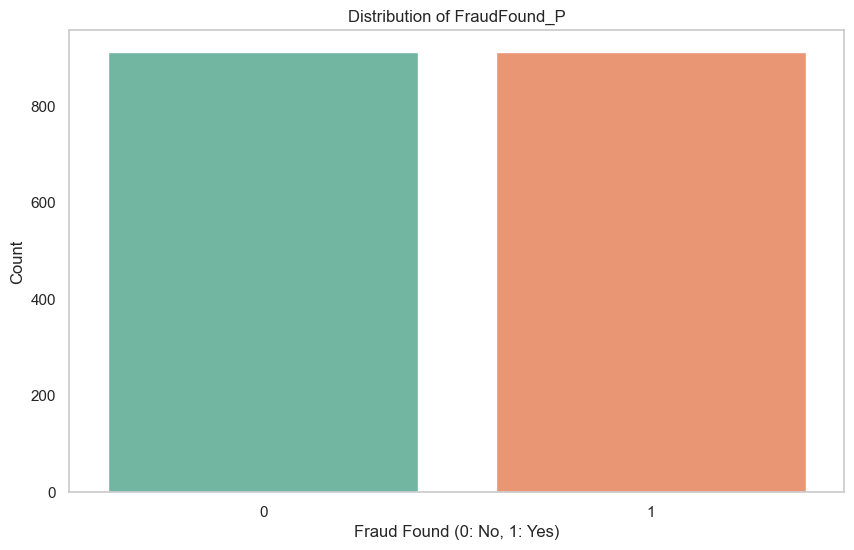

In [279]:
# datasets should be concatenated
combined = pd.concat([normal_sample, fraud], axis=0)

plt.figure(figsize=(10, 6))
sns.countplot(x='FraudFound_P', data=combined, palette='Set2')
plt.title('Distribution of FraudFound_P')
plt.xlabel('Fraud Found (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [280]:
x = combined.drop(columns=['FraudFound_P'])
y = combined['FraudFound_P']

In [281]:
# Feature scaling
scaler = StandardScaler()
xscal = scaler.fit_transform(x)

# scaled features to DataFrame and retain column names
xscal_df = pd.DataFrame(xscal, columns=x.columns)

xscal_df.head()

,Age,Deductible,DriverRating,mid_price,Days_Policy_Accident_Numeric,Days_Policy_Claim_Numeric,PastNumberOfClaims_Numeric,AgeOfVehicle_Numeric,AgeOfPolicyHolder_Numeric,NumberOfSuppliments_Numeric,AddressChange_Claim_Numeric,NumberOfCars_Numeric,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,BasePolicy_Collision,BasePolicy_Liability
0,-0.146986,-0.202477,-1.310765,-0.642857,0.1271,0.087293,-1.027637,0.101689,-0.156184,1.631799,-0.275896,-0.256116,-0.023421,-0.341998,-0.062069,0.0,-0.172993,-0.464758,0.0,0.0,-0.417733,-0.023421,-0.077893,-0.033131,-0.572286,0.0,-0.087948,-0.070418,1.939691,-0.11547,0.363615,0.395761,0.653628,-0.645096,-0.046881,-0.430331,1.246845,-0.492450,-0.033131,-0.192231,0.0,-0.179605,-0.052429,0.0,-0.549479,-0.187583,6.765296,-0.052429,-0.102598,1.151751,-0.492450
1,0.295792,-0.202477,-1.310765,-0.172845,0.1271,0.087293,0.553254,-0.474339,-0.156184,-0.833130,-0.275896,-0.256116,-0.023421,2.923994,-0.062069,0.0,-0.172993,-0.464758,0.0,0.0,-0.417733,-0.023421,-0.077893,-0.033131,-0.572286,0.0,-0.087948,-0.070418,-0.515546,-0.11547,0.363615,0.395761,0.653628,-0.645096,-0.046881,2.323790,1.246845,-0.492450,-0.033131,-0.192231,0.0,-0.179605,-0.052429,0.0,-0.549479,-0.187583,-0.147813,-0.052429,-0.102598,1.151751,-0.492450
2,0.295792,-0.202477,0.458259,2.177217,0.1271,0.087293,-1.027637,0.101689,-0.156184,-0.833130,-0.275896,4.610083,-0.023421,2.923994,-0.062069,0.0,-0.172993,-0.464758,0.0,0.0,-0.417733,-0.023421,-0.077893,-0.033131,-0.572286,0.0,-0.087948,-0.070418,-0.515546,-0.11547,0.363615,0.395761,0.653628,-0.645096,-0.046881,-0.430331,-0.802024,2.030664,-0.033131,-0.192231,0.0,-0.179605,-0.052429,0.0,1.819906,-0.187583,-0.147813,-0.052429,-0.102598,-0.868243,2.030664
3,-0.146986,-0.202477,0.458259,-0.642857,0.1271,0.087293,-1.027637,0.101689,-0.156184,-0.833130,-0.275896,-0.256116,-0.023421,-0.341998,-0.062069,0.0,-0.172993,-0.464758,0.0,0.0,2.393873,-0.023421,-0.077893,-0.033131,-0.572286,0.0,-0.087948,-0.070418,-0.515546,-0.11547,0.363615,0.395761,-1.529921,1.550156,-0.046881,-0.430331,1.246845,-0.492450,-0.033131,-0.192231,0.0,-0.179605,-0.052429,0.0,-0.549479,-0.187583,-0.147813,-0.052429,-0.102598,1.151751,-0.492450
4,1.550330,-0.202477,1.342771,-0.172845,0.1271,0.087293,-0.500673,1.253745,1.769658,-0.833130,-0.275896,-0.256116,-0.023421,-0.341998,-0.062069,0.0,-0.172993,-0.464758,0.0,0.0,-0.417733,-0.023421,-0.077893,-0.033131,-0.572286,0.0,-0.087948,-0.070418,1.939691,-0.11547,0.363615,0.395761,0.653628,-0.645096,-0.046881,-0.430331,1.246845,-0.492450,-0.033131,-0.192231,0.0,-0.179605,-0.052429,0.0,-0.549479,-0.187583,-0.147813,-0.052429,9.746794,1.151751,-0.492450


In [282]:
x_train, x_test, y_train, y_test = train_test_split(xscal,y,test_size= 0.3,random_state=0)

In [283]:
# the parameter grid
param_grid = [
    {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},  # liblinear supports only l1 and l2
    {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.5, 0.7]},  # saga supports elasticnet with l1_ratio
]

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the Grid Search
grid_search.fit(x_train, y_train)

# best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# predictions with the best model
y_pred = best_model.predict(x_test)

# metrics
f1_ulr = f1_score(y_test, y_pred)  
accuracy_ulr = accuracy_score(y_test, y_pred)
recall_ulr = recall_score(y_test, y_pred)
precision_ulr = precision_score(y_test, y_pred)

# results
print(f"Best Parameters: {best_params}")
print(f"F1 Score: {f1_ulr:.2f}")
print(f"Accuracy: {accuracy_ulr:.2f}")
print(f"Recall: {recall_ulr:.2f}")
print(f"Precision: {precision_ulr:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
F1 Score: 0.79
Accuracy: 0.75
Recall: 0.92
Precision: 0.69
Confusion Matrix:
[[164 113]
 [ 22 249]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.59      0.71       277
           1       0.69      0.92      0.79       271

    accuracy                           0.75       548
   macro avg       0.78      0.76      0.75       548
weighted avg       0.79      0.75      0.75       548



In [284]:
new_row = pd.DataFrame([{'Model': 'Logistic Regression with GridSearch and Undersampling', 'Accuracy': accuracy_ulr, 'Precision' : precision_ulr,'Recall': recall_ulr,'F1 Score': f1_ulr }])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df.head()

,Model,Accuracy,Precision,Recall,F1 Score
0,Isolation Forest,0.865846,0.068627,0.108527,0.084084
1,Isolation Forest with SMOTEENN,0.434549,0.384270,0.041707,0.075248
2,Isolation Forest with GridSearch and SMOTEENN,0.445581,0.343284,0.005610,0.011039
3,Logistic Regression with GridSearch and Unders...,0.753650,0.687845,0.918819,0.786730


# 5.5 - Decision Tree Classifier with GridSearch and Undersampling

In [285]:
# Model
dtree = DecisionTreeClassifier(random_state=42)

# parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10]
}


In [286]:
# Step 3: Perform Grid Search
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [287]:
# Train the model with the best parameters
best_dtree = grid_search.best_estimator_
best_dtree.fit(x_train, y_train)

# predictions
y_pred_dtree = best_dtree.predict(x_test)

# evaluation metrics
accuracy_udt = accuracy_score(y_test, y_pred_dtree)
precision_udt = precision_score(y_test, y_pred_dtree)
recall_udt = recall_score(y_test, y_pred_dtree)
f1_udt = f1_score(y_test, y_pred_dtree)

# results
print(f"Accuracy: {accuracy_udt:.2f}")
print(f"Precision: {precision_udt:.2f}")
print(f"Recall: {recall_udt:.2f}")
print(f"F1: {f1_udt:.2f}")

# Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred_dtree)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred_dtree)
print("Classification Report:")
print(class_report)

Accuracy: 0.75
Precision: 0.68
Recall: 0.94
F1: 0.79
Confusion Matrix:
[[157 120]
 [ 16 255]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.57      0.70       277
           1       0.68      0.94      0.79       271

    accuracy                           0.75       548
   macro avg       0.79      0.75      0.74       548
weighted avg       0.80      0.75      0.74       548



In [288]:
new_row = pd.DataFrame([{'Model': 'Decision Tree Classifier with GridSearch and Undersampling', 'Accuracy': accuracy_udt, 'Precision' : precision_udt,'Recall': recall_udt,'F1 Score': f1_udt }])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df.head()

,Model,Accuracy,Precision,Recall,F1 Score
0,Isolation Forest,0.865846,0.068627,0.108527,0.084084
1,Isolation Forest with SMOTEENN,0.434549,0.384270,0.041707,0.075248
2,Isolation Forest with GridSearch and SMOTEENN,0.445581,0.343284,0.005610,0.011039
3,Logistic Regression with GridSearch and Unders...,0.753650,0.687845,0.918819,0.786730
4,Decision Tree Classifier with GridSearch and U...,0.751825,0.680000,0.940959,0.789474


# 5.6 - Random Forest Classifier with GridSearch and Undersampling

In [289]:
# Model
rf = RandomForestClassifier(random_state=42)

# parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10]
}

In [290]:
# Step 3: Perform Grid Search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

# Best parameters
best_params_rf = grid_search_rf.best_params_
print("Best Parameters:", best_params_rf)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [291]:
# Step 4: Train the model with the best parameters
best_rf = grid_search_rf.best_estimator_
best_rf.fit(x_train, y_train)

# Step 5: Make predictions
y_pred_rf = best_rf.predict(x_test)

# Step 6: Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

# Print the results
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")

# Step 7: Confusion Matrix and Classification Report
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(class_report_rf)

Accuracy: 0.78
Precision: 0.70
Recall: 0.96
Confusion Matrix:
[[164 113]
 [ 10 261]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.59      0.73       277
           1       0.70      0.96      0.81       271

    accuracy                           0.78       548
   macro avg       0.82      0.78      0.77       548
weighted avg       0.82      0.78      0.77       548



In [292]:
f1_rf = f1_score(y_test, y_pred_rf)
print(f"F1: {f1_rf:.2f}")

F1: 0.81


In [293]:
new_row_rf = pd.DataFrame([{'Model': 'Random Forest Classifier with GridSearch and Undersampling', 'Accuracy': accuracy_rf, 'Precision' : precision_rf,'Recall': recall_rf,'F1 Score': f1_rf }])
results_df = pd.concat([results_df, new_row_rf], ignore_index=True)
results_df.head(8)

,Model,Accuracy,Precision,Recall,F1 Score
0,Isolation Forest,0.865846,0.068627,0.108527,0.084084
1,Isolation Forest with SMOTEENN,0.434549,0.384270,0.041707,0.075248
2,Isolation Forest with GridSearch and SMOTEENN,0.445581,0.343284,0.005610,0.011039
3,Logistic Regression with GridSearch and Unders...,0.753650,0.687845,0.918819,0.786730
4,Decision Tree Classifier with GridSearch and U...,0.751825,0.680000,0.940959,0.789474
5,Random Forest Classifier with GridSearch and U...,0.775547,0.697861,0.963100,0.809302


AUC Score: 0.82


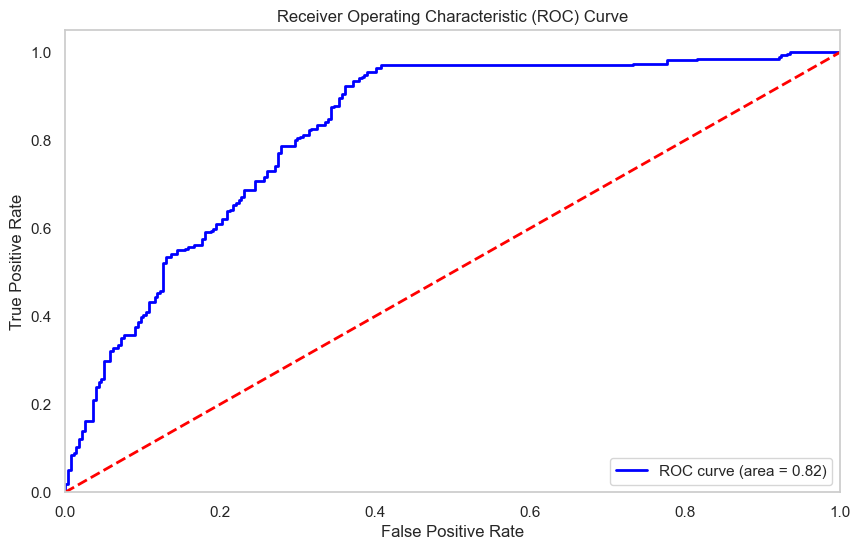

In [294]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the probabilities for the positive class
y_probs = best_rf.predict_proba(x_test)[:, 1]  # Get probabilities for class 1

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)  # Calculate AUC

# Print the AUC score
print(f'AUC Score: {roc_auc:.2f}')

# Step 4: Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# 5.7 - Logistic Regression with GridSearch and Oversampling

In [295]:
from imblearn.over_sampling import SMOTE

In [296]:
df.head()

,Age,FraudFound_P,Deductible,DriverRating,mid_price,Days_Policy_Accident_Numeric,Days_Policy_Claim_Numeric,PastNumberOfClaims_Numeric,AgeOfVehicle_Numeric,AgeOfPolicyHolder_Numeric,NumberOfSuppliments_Numeric,AddressChange_Claim_Numeric,NumberOfCars_Numeric,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Urban,Sex_Male,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Third Party,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sport,VehicleCategory_Utility,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,BasePolicy_Collision,BasePolicy_Liability
0,21,0,300,1,84500.0,60.0,60.0,0.0,3,28.0,0.0,1.0,3.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,34,0,400,4,84500.0,60.0,60.0,0.0,6,33.0,0.0,0.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
2,47,0,400,3,84500.0,60.0,60.0,1.0,7,45.5,0.0,0.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,65,0,400,2,24500.0,60.0,60.0,1.0,9,58.0,7.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1
4,27,0,400,1,84500.0,60.0,60.0,0.0,5,33.0,0.0,0.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [297]:
x = df.drop(columns=['FraudFound_P'])
y = df['FraudFound_P']

In [298]:
# Scale the features
scaler = StandardScaler()
xscal = scaler.fit_transform(x)
xscal_df = pd.DataFrame(xscal, columns=x.columns)

In [299]:
x_res, y_rest = SMOTE().fit_resample(xscal,y)

In [300]:
y_rest.value_counts()

FraudFound_P
0    14243
1    14243
Name: count, dtype: int64

In [301]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_res,y_rest,test_size= 0.3,random_state=0)

In [302]:
# Define the Logistic Regression model and parameter grid
model = LogisticRegression(solver='liblinear')  

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization techniques
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)

#  Fit the model
grid_search.fit(xr_train, yr_train)

# best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
yr_pred_olr = best_model.predict(xr_test)

# Calculate metrics
f1_olr = f1_score(yr_test, yr_pred_olr)
accuracy= accuracy_score(yr_test, yr_pred_olr)
precision_olr = precision_score(yr_test, yr_pred_olr)
recall_olr = recall_score(yr_test, yr_pred_olr)

conf_matrix = confusion_matrix(yr_test, yr_pred_olr)
class_report = classification_report(yr_test, yr_pred_olr)

# Step 7: Print results
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy_olr:.2f}')
print(f'Precision: {precision_olr:.2f}')
print(f'Recall: {recall_olr:.2f}')
print(f'F1 Score: {f1_olr:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Best Parameters: {'C': 0.001, 'penalty': 'l1'}
Accuracy: 0.76
Precision: 0.69
Recall: 0.93
F1 Score: 0.79
Confusion Matrix:
[[2463 1790]
 [ 281 4012]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.58      0.70      4253
           1       0.69      0.93      0.79      4293

    accuracy                           0.76      8546
   macro avg       0.79      0.76      0.75      8546
weighted avg       0.79      0.76      0.75      8546



In [303]:
new_row_rf = pd.DataFrame([{'Model': 'Logistic Regression with GridSearch and Oversampling', 'Accuracy': accuracy_olr, 'Precision' : precision_olr,'Recall': recall_olr,'F1 Score': f1_olr }])
results_df = pd.concat([results_df, new_row_rf], ignore_index=True)
results_df.head(15)

,Model,Accuracy,Precision,Recall,F1 Score
0,Isolation Forest,0.865846,0.068627,0.108527,0.084084
1,Isolation Forest with SMOTEENN,0.434549,0.384270,0.041707,0.075248
2,Isolation Forest with GridSearch and SMOTEENN,0.445581,0.343284,0.005610,0.011039
3,Logistic Regression with GridSearch and Unders...,0.753650,0.687845,0.918819,0.786730
4,Decision Tree Classifier with GridSearch and U...,0.751825,0.680000,0.940959,0.789474
5,Random Forest Classifier with GridSearch and U...,0.775547,0.697861,0.963100,0.809302
6,Logistic Regression with GridSearch and Oversa...,0.759420,0.691486,0.934545,0.794849


# 5.8 - Random Forest Classifier with GridSearch and Oversampling

In [ ]:
#  model
rf_model = RandomForestClassifier(random_state=42)

# GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='f1', cv=3, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(xr_train, yr_train)

# best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# predictions
y_pred = grid_search.predict(xr_test)

# metrics
accuracy_orf = accuracy_score(yr_test, y_pred)
precision_orf = precision_score(yr_test, y_pred)
recall_orf = recall_score(yr_test, y_pred)
f1_orf = f1_score(yr_test, y_pred)

# Display metrics and confusion matrix
print(f"Accuracy: {accuracy_orf:.2f}")
print(f"Precision: {precision_orf:.2f}")
print(f"Recall: {recall_orf:.2f}")
print(f"F1 Score: {f1_orf:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(yr_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(yr_test, y_pred)
print("Classification Report:")
print(class_report)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [ ]:
new_row_rf = pd.DataFrame([{'Model': 'Random Forest Classifier with GridSearch and Oversampling', 'Accuracy': accuracy_orf, 'Precision' : precision_orf,'Recall': recall_orf,'F1 Score': f1_orf }])
results_df = pd.concat([results_df, new_row_rf], ignore_index=True)
results_df.head(15)

# 6 - Best Model Selection and Interpretation of its Results

The Random Forest Classifier with GridSearch and Oversampling model is very effective, achieving high accuracy, precision, recall, and F1 scores. The choice of hyperparameters suggests a model well-tuned to the data, capturing its complexity while still generalizing well. 